In [15]:
!pip install tabula-py pandas
import tabula
import pandas as pd
import fitz
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.1 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
pdf_path = '/content/drive/MyDrive/APEX_Loans_Database_Table.pdf'
excel_path = '/content/drive/MyDrive/APEX Loan Data.xlsx'

In [35]:
# loan databe
df_loan_data = pd.read_excel(excel_path)
df_loan_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [49]:
# loan_database

#data from pdf tfile as table of dataframe
dfs = tabula.read_pdf(pdf_path, pages='all', multiple_tables=False)

columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
           'Credit_History', 'Property_Area', 'Loan_Status']
#list of df
selected_dfs = []

#specific columns to DataFrame
for df in dfs:
    selected_dfs.append(df[columns])
df_loan_database = pd.concat(selected_dfs, ignore_index=True)
df_loan_database.head()


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [57]:
#datatype of loan_database
print('Loand database')
print()
print(df_loan_database.dtypes)
#datatype of loand_data
print()
print('Loand data')
print()
print(df_loan_data.dtypes)

Loand database

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Graduate               int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status           object
dtype: object

Loand data

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Graduate               int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status           object
dtype: object


In [59]:
#preprocessing libraries
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [60]:
#for Loan database
# Missing Values
df_loan_database = df_loan_database.dropna()
#  Duplicates
df_loan_database = df_loan_database.drop_duplicates()
# Outliers
df_loan_database = df_loan_database[(np.abs(stats.zscore(df_loan_database.select_dtypes(include=['number']))) < 3).all(axis=1)]

In [61]:
print(df_loan_database.head())

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     1002       1        0           0         1              0   
1     1003       1        1           1         1              0   
2     1005       1        1           0         1              1   
3     1006       1        1           0         0              0   
4     1008       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Property_Area Loan_Status  
0               1              1           Y  
1               1              3           N  
2               1      

In [62]:
#for loan data
# Missing Values
df_loan_data = df_loan_data.dropna()
# Duplicates
df_loan_data = df_loan_data.drop_duplicates()
# Outliers
df_loan_data = df_loan_data[(np.abs(stats.zscore(df_loan_data.select_dtypes(include=['number']))) < 3).all(axis=1)]
print(df_loan_data.head())

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
5     2300       2        0           0         0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
5             1963                0.0          53               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

**Descriptive anlysis on loan data**

In [63]:
# Statistics summary
summary_stats = df_loan_data.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
           Loan_ID      Gender    Married  Dependents    Graduate  \
count   230.000000  230.000000  230.00000  230.000000  230.000000   
mean   2538.795652    1.195652    0.63913    0.726087    0.730435   
std     303.166314    0.397567    0.48130    0.984029    0.444702   
min    1900.000000    1.000000    0.00000    0.000000    0.000000   
25%    2369.250000    1.000000    0.00000    0.000000    0.000000   
50%    2550.000000    1.000000    1.00000    0.000000    1.000000   
75%    2777.750000    1.000000    1.00000    1.000000    1.000000   
max    2990.000000    2.000000    1.00000    3.000000    1.000000   

       Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count     230.000000       230.000000         230.000000  230.000000   
mean        0.139130      4772.643478        1314.482261  142.769565   
std         0.346837      3423.599585        1492.973907   69.560968   
min         0.000000       210.000000           0.000000    9.000000  

In [64]:
# Frequency Distribution
categorical_cols = df_loan_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("\nFrequency distribution for", col)
    print(df_loan_data[col].value_counts())



Frequency distribution for Loan_Status
Y    157
N     73
Name: Loan_Status, dtype: int64


<ipython-input-70-140fb881eee3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_loan_data.corr()



Correlation Matrix:


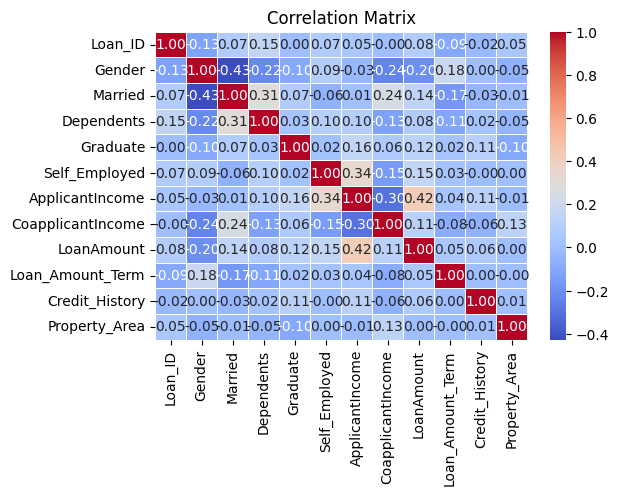

In [70]:
# Correlation Analysis
correlation_matrix = df_loan_data.corr()
print("\nCorrelation Matrix:")
import seaborn as sns
# Plot Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

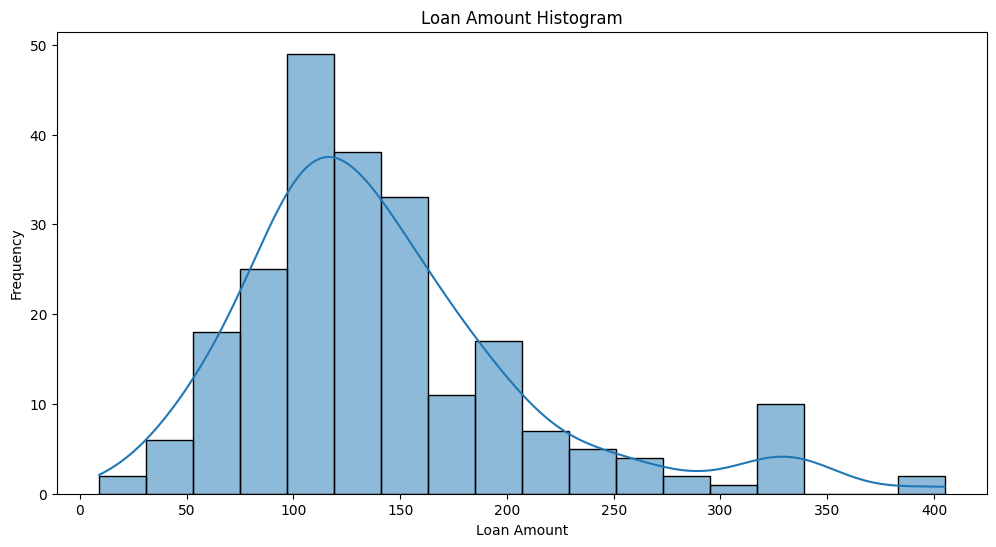

In [69]:
#plot data
plt.figure(figsize=(12, 6))
sns.histplot(df_loan_data['LoanAmount'], kde=True)
plt.title('Loan Amount Histogram')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Mentioned Exploratory Data Analysis**

Total amount loaned by AFS: 32837
Average amount loaned: 142.76956521739132
Average of loan term: 325.68260869565216


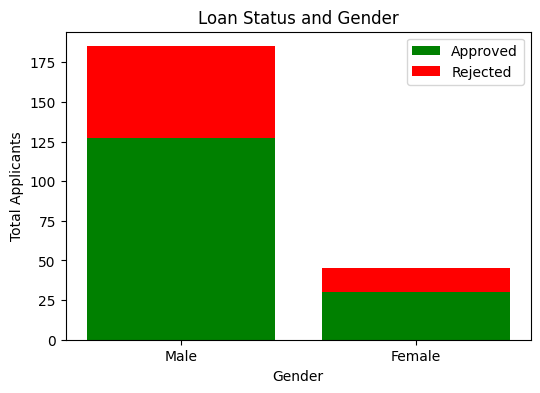

In [74]:
#total amount loaned
total_amount_loaned = df_loan_data['LoanAmount'].sum()
print("Total amount loaned by AFS:", total_amount_loaned)

# average loaned amount
average_loan_amount = df_loan_data['LoanAmount'].mean()
print("Average amount loaned:", average_loan_amount)

# average term loaned
average_loan_term = df_loan_data['Loan_Amount_Term'].mean()
print("Average of loan term:", average_loan_term)

# Approved and Rejected
approved_applicants = df_loan_data[df_loan_data['Loan_Status'] == 'Y']
rejected_applicants = df_loan_data[df_loan_data['Loan_Status'] == 'N']
#let 1 for male and 2 for female
approved_gender_count = approved_applicants['Gender'].map({1: 'Male', 2: 'Female'}).value_counts()
rejected_gender_count = rejected_applicants['Gender'].map({1: 'Male', 2: 'Female'}).value_counts()

plt.figure(figsize=(6, 4))
plt.bar(approved_gender_count.index, approved_gender_count.values, label='Approved', color='green')
plt.bar(rejected_gender_count.index, rejected_gender_count.values, bottom=approved_gender_count.values, label='Rejected', color='red')
plt.xlabel('Gender')
plt.ylabel('Total Applicants')
plt.title('Loan Status and Gender')
plt.legend()
plt.show()


Maximum Loan Amount: 405
Minimum Loan Amount: 9


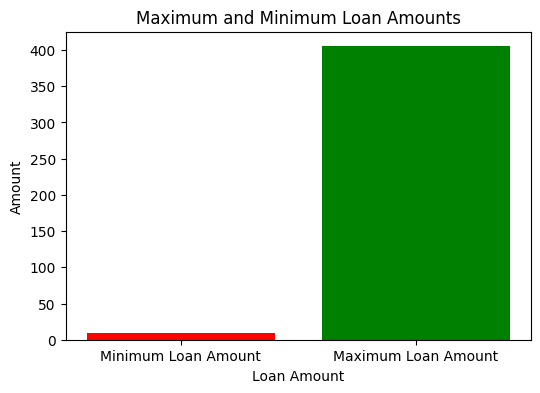

In [81]:
# minimum and maximum loan
max_loan_amount = df_loan_data['LoanAmount'].max()
min_loan_amount = df_loan_data['LoanAmount'].min()
print("Maximum Loan Amount:", max_loan_amount)
print("Minimum Loan Amount:", min_loan_amount)

# plot loan amount
loan_amounts = [min_loan_amount, max_loan_amount]
labels = ['Minimum Loan Amount', 'Maximum Loan Amount']

plt.figure(figsize=(6, 4))
plt.bar(labels, loan_amounts, color=['red', 'green'])
plt.xlabel('Loan Amount')
plt.ylabel('Amount')
plt.title('Maximum and Minimum Loan Amounts')
plt.show()

 % of Self-Employed Approved Applications: 13.375796178343949


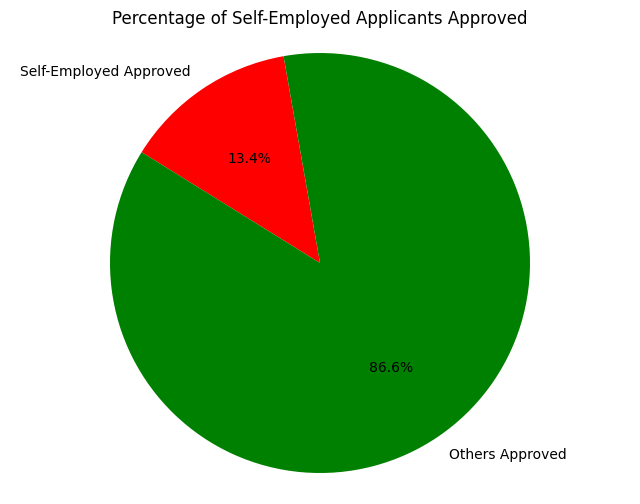

In [80]:
# % of self-employed having loan approved
approved_self_employed = df_loan_data[(df_loan_data['Self_Employed'] == 1) & (df_loan_data['Loan_Status'] == 'Y')]
total_approved = len(df_loan_data[df_loan_data['Loan_Status'] == 'Y'])

percentage_self_employed_approved = (len(approved_self_employed) / total_approved) * 100

print(" % of Self-Employed Approved Applications:", percentage_self_employed_approved)

# ploting
labels = ['Self-Employed Approved', 'Others Approved']
sizes = [percentage_self_employed_approved, 100 - percentage_self_employed_approved]
colors = ['red', 'green']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.axis('equal')
plt.title('Percentage of Self-Employed Applicants Approved')
plt.show()

In [82]:
# All main applicants income
income_stats = df_loan_data['ApplicantIncome'].describe()
average_income = income_stats['mean']
std_dev_income = income_stats['std']
print("Average Income:", average_income)
print("Standard Deviation of Income:", std_dev_income)

Average Income: 4772.643478260869
Standard Deviation of Income: 3423.59958477604


In [83]:
# top 10 application
top_ten_applicants = df_loan_data.nlargest(10, 'LoanAmount')[['Loan_ID', 'LoanAmount']]
print("\nTop Ten Applicants by Loan Amount:")
print(top_ten_applicants)


Top Ten Applicants by Loan Amount:
     Loan_ID  LoanAmount
65      2386         405
158     2699         400
20      1922         333
41      1990         333
68      2393         333
70      2401         333
112     2533         333
157     2697         333
183     2778         333
184     2784         333


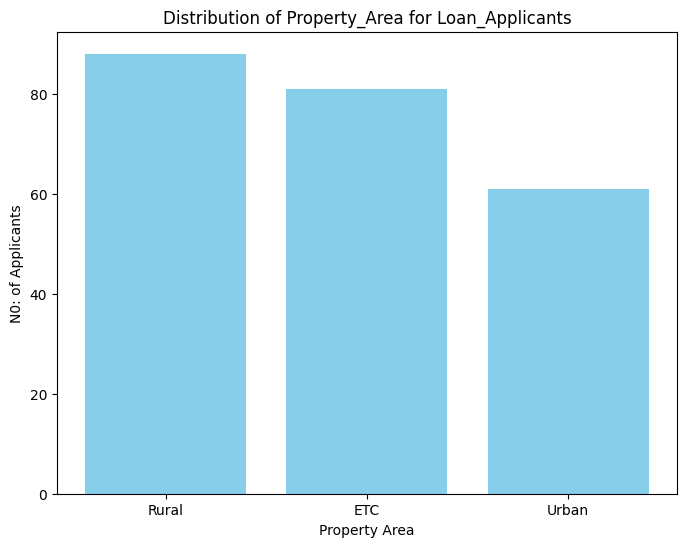

In [85]:
# Distribution  properties: all loan applicants
property_distribution = df_loan_data['Property_Area'].map({1: 'Urban', 2: 'Rural', 3: 'ETC'}).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(property_distribution.index, property_distribution.values, color='skyblue')
plt.xlabel('Property Area')
plt.ylabel('N0: of Applicants')
plt.title('Distribution of Property_Area for Loan_Applicants')
plt.show()

**Psuedo Code design**

In [ ]:

# Load Data
import pandas as pd
loan_data = pd.read_excel('loan_data.xlsx')

# Data Cleaning
loan_data_cleaned = loan_data.dropna()
loan_data_cleaned = loan_data_cleaned.drop_duplicates()
loan_data_cleaned = loan_data_cleaned[(np.abs(stats.zscore(loan_data_cleaned.select_dtypes(include=['number']))) < 3).all(axis=1)]

# Feature Engineering
# new features
loan_data_cleaned['TotalIncome'] = loan_data_cleaned['ApplicantIncome'] + loan_data_cleaned['CoapplicantIncome']

# Data Analysis & Prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = loan_data_cleaned[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
y = loan_data_cleaned['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
